In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

C:\Users\elkha\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r'C:\Users\elkha\Downloads\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
must_spend = df['Spending Score (1-100)'] >50
df_2 = df[must_spend]
df_2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72


In [6]:
df_2.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,97.000000,97.000000,97.000000,97.000000
mean,100.298969,34.597938,60.412371,71.670103
std,59.122783,13.024544,26.756133,14.710910
min,2.000000,18.000000,15.000000,51.000000
25%,51.000000,26.000000,42.000000,57.000000
50%,96.000000,31.000000,60.000000,73.000000
75%,152.000000,38.000000,78.000000,85.000000
max,200.000000,70.000000,137.000000,99.000000


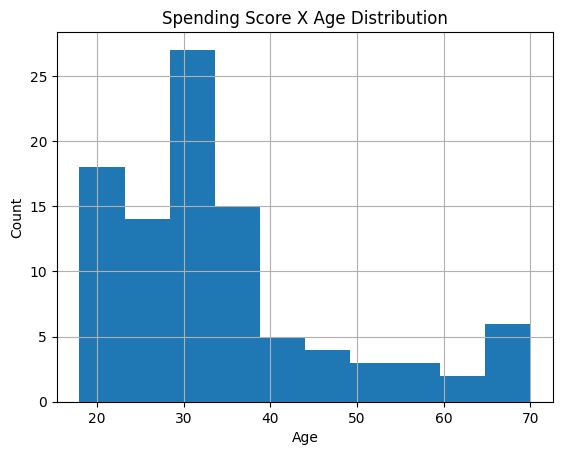

In [7]:
df_2['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Spending Score X Age Distribution');

 people who have spending score greater than 50 are younger.

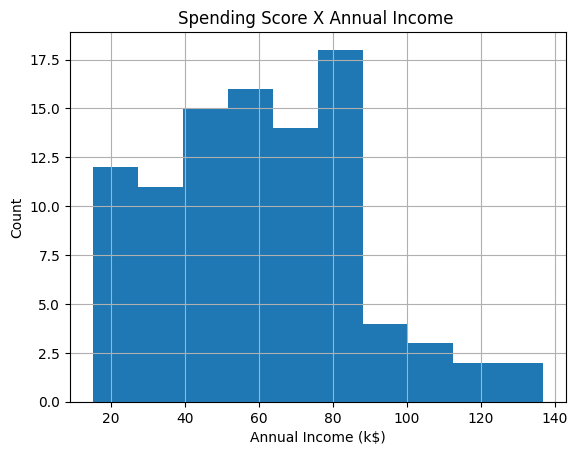

In [8]:
df_2['Annual Income (k$)'].hist()
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.title('Spending Score X Annual Income ');

People who have a spending score greater than 50 are those whose annual income is less than 100

In [9]:
plt.figure(figsize = (15,4))
sns.countplot(y='Gender',data = df_score)
plt.title('Spending Score (51-100): Gender Distribution')
plt.show();

NameError: name 'df_score' is not defined

<Figure size 1500x400 with 0 Axes>

females spend more than the males

In [ ]:
plt.figure(1,figsize = (15,6))
for gender in ['Male','Female']:
    plt.scatter(x = 'Age',y = 'Annual Income (k$)',data =df[df['Gender'] == gender],s = 200,alpha = 0.7,label = gender)
plt.xlabel('Age'),plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income according to Gender')
plt.legend()
plt.show()

C:\Users\elkha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\elkha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\elkha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\elkha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future vers

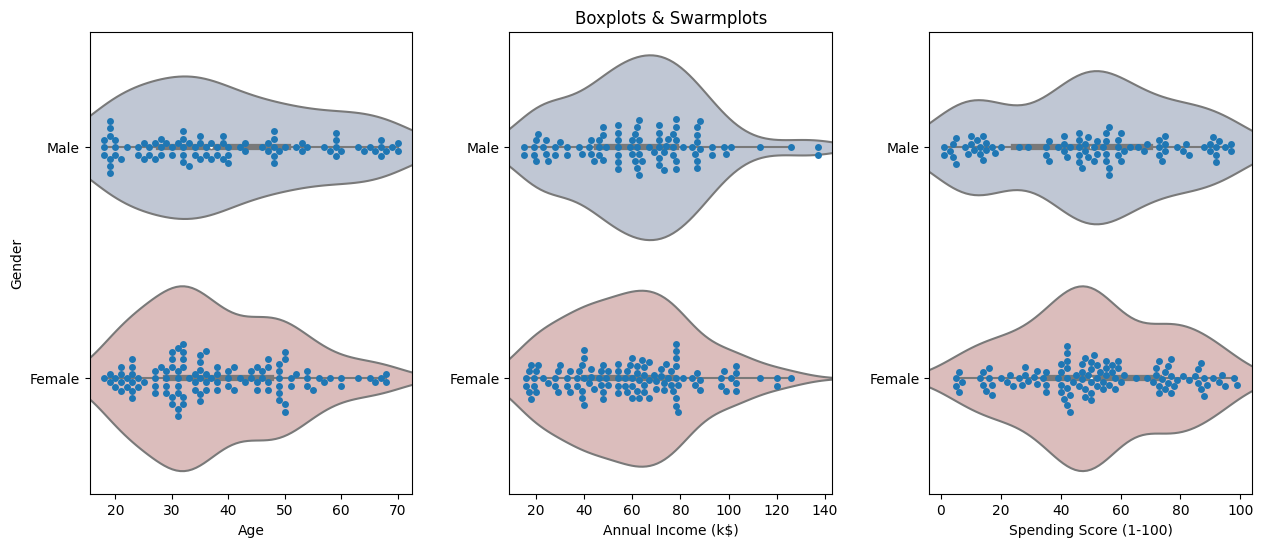

In [10]:
plt.figure(1,figsize = (15,6))
n = 0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.3,wspace = 0.3)
    sns.violinplot(x = cols,y = 'Gender',data = df,palette = 'vlag')
    sns.swarmplot(x = cols,y = 'Gender',data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show();

# Clustering using K-Means

In [11]:
X= df.iloc[:,[3,4]]
print(f"X Shape {X.shape}")
X.head(10)


X Shape (200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


In [13]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []
#Add a for loop to train model and calculate inertia,silhouette score.
for k in n_clusters:
    model = KMeans(n_clusters = k,random_state=42,n_init=10)
    #Train Model
    model.fit(X)
    #Calculate Inertia
    inertia_errors.append(model.inertia_)
    #Calculate Silhouette Score
    silhouette_scores.append(silhouette_score(X,model.labels_))
print("Inertia:",inertia_errors[:3])
print()
print("Silhouette Scores:",silhouette_scores[:3])

C:\Users\elkha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\elkha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\elkha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\elkha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

Inertia: [181363.59595959593, 106348.37306211122, 73679.78903948836]

Silhouette Scores: [0.2968969162503008, 0.46761358158775435, 0.4931963109249047]


C:\Users\elkha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# ELBOW METHOD

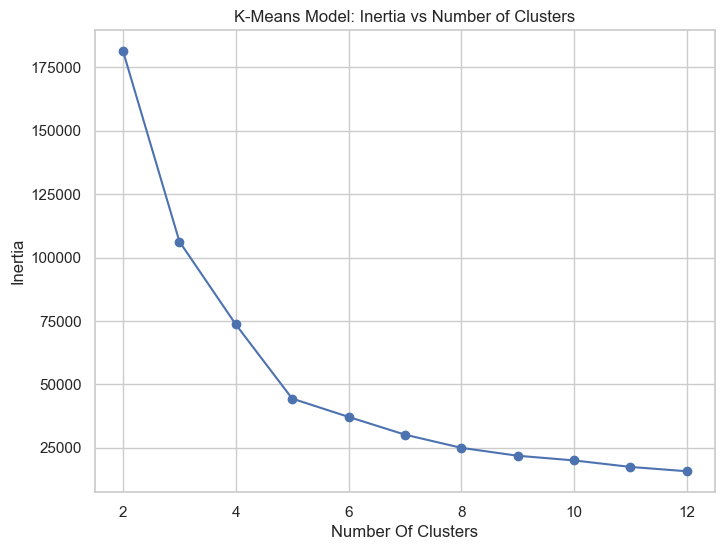

In [14]:
#Create a line plot of inertia_errors vs n_clusters
x_values = list(range(2, 13)) 

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Set Seaborn style

# Create a line plot using Matplotlib
plt.plot(x_values, inertia_errors, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('K-Means Model: Inertia vs Number of Clusters')
plt.xlabel('Number Of Clusters')
plt.ylabel('Inertia')

# Turn on grid and show plot
plt.grid(True)
plt.show()

In [15]:
final_model = KMeans(n_clusters=5,random_state=42,n_init=10)
final_model.fit(X)

C:\Users\elkha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, n_init=10, random_state=42)

In [26]:
labels = final_model.labels_
centroids = final_model.cluster_centers_
print(labels[:5])
print(centroids[:5])

[4 2 4 2 4]
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [17]:
xgb = X.groupby(final_model.labels_).mean()

In [21]:
xgb

,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


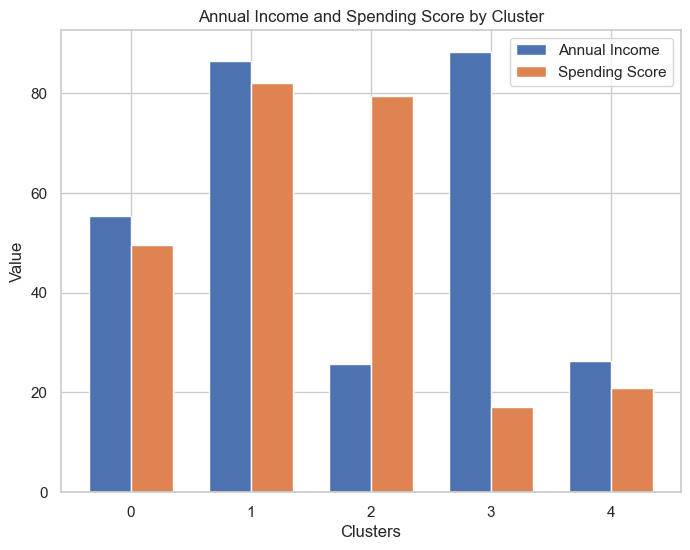

In [19]:
# Create side-by-side bar chart of `xgb`
plt.figure(figsize=(8, 6))

x = [0,1,2,3,4]
x_labels = labels
income_values = xgb['Annual Income (k$)']
spending_values = xgb['Spending Score (1-100)']

bar_width = 0.35
index = range(len(x))

# Create grouped bar plot using Matplotlib
plt.bar(index, income_values, bar_width, label='Annual Income')
plt.bar([i + bar_width for i in index], spending_values, bar_width, label='Spending Score')

# Add labels and title
plt.xlabel('Clusters')
plt.ylabel('Value')
plt.title('Annual Income and Spending Score by Cluster')
plt.xticks([i + bar_width / 2 for i in index], x)
plt.legend()

# Show plot
plt.show()